# 数据可视化 2100093010 吕东炫 个人作业一

In [142]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 使用的数据集：“python数据分析” citibike-tripdata数据集，包含不同用户的骑行记录

In [143]:
bikedata = pd.read_csv('./citibike-tripdata.csv')
bikedata

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,364,2017-07-01 00:00:00,2017-07-01 00:06:05,539,Metropolitan Ave & Bedford Ave,40.715348,-73.960241,3107,Bedford Ave & Nassau Ave,40.723117,-73.952123,14744,Subscriber,1986.0,1
1,2142,2017-07-01 00:00:03,2017-07-01 00:35:46,293,Lafayette St & E 8 St,40.730207,-73.991026,3425,2 Ave & E 104 St,40.789211,-73.943708,19587,Subscriber,1981.0,1
2,328,2017-07-01 00:00:08,2017-07-01 00:05:37,3242,Schermerhorn St & Court St,40.691029,-73.991834,3397,Court St & Nelson St,40.676395,-73.998699,27937,Subscriber,1984.0,2
3,2530,2017-07-01 00:00:11,2017-07-01 00:42:22,2002,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,398,Atlantic Ave & Furman St,40.691652,-73.999979,26066,Subscriber,1985.0,1
4,2534,2017-07-01 00:00:15,2017-07-01 00:42:29,2002,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,398,Atlantic Ave & Furman St,40.691652,-73.999979,29408,Subscriber,1982.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1735594,560,2017-07-31 23:59:33,2017-08-01 00:08:53,3260,Mercer St & Bleecker St,40.727064,-73.996621,236,St Marks Pl & 2 Ave,40.728419,-73.987140,16126,Subscriber,1990.0,2
1735595,272,2017-07-31 23:59:35,2017-08-01 00:04:08,247,Perry St & Bleecker St,40.735354,-74.004831,434,9 Ave & W 18 St,40.743174,-74.003664,27684,Subscriber,1999.0,1
1735596,1211,2017-07-31 23:59:37,2017-08-01 00:19:49,3303,Butler St & Court St,40.684989,-73.994403,3308,Kane St & Clinton St,40.686176,-73.996453,28402,Subscriber,1975.0,2
1735597,547,2017-07-31 23:59:48,2017-08-01 00:08:56,276,Duane St & Greenwich St,40.717488,-74.010455,127,Barrow St & Hudson St,40.731724,-74.006744,30150,Subscriber,1992.0,1


In [144]:
# 查看哪些列有缺失值
bikedata.isnull().sum()

tripduration                    0
starttime                       0
stoptime                        0
start station id                0
start station name              0
start station latitude          0
start station longitude         0
end station id                  0
end station name                0
end station latitude            0
end station longitude           0
bikeid                          0
usertype                        0
birth year                 228596
gender                          0
dtype: int64

In [145]:
# 将 birth year 为缺失值的行视为无效样本，去除掉
bikedata = bikedata.dropna(subset = ['birth year'])
bikedata['birth year'] = bikedata['birth year'].astype(int)
bikedata = bikedata.reset_index(drop = True)
bikedata

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,364,2017-07-01 00:00:00,2017-07-01 00:06:05,539,Metropolitan Ave & Bedford Ave,40.715348,-73.960241,3107,Bedford Ave & Nassau Ave,40.723117,-73.952123,14744,Subscriber,1986,1
1,2142,2017-07-01 00:00:03,2017-07-01 00:35:46,293,Lafayette St & E 8 St,40.730207,-73.991026,3425,2 Ave & E 104 St,40.789211,-73.943708,19587,Subscriber,1981,1
2,328,2017-07-01 00:00:08,2017-07-01 00:05:37,3242,Schermerhorn St & Court St,40.691029,-73.991834,3397,Court St & Nelson St,40.676395,-73.998699,27937,Subscriber,1984,2
3,2530,2017-07-01 00:00:11,2017-07-01 00:42:22,2002,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,398,Atlantic Ave & Furman St,40.691652,-73.999979,26066,Subscriber,1985,1
4,2534,2017-07-01 00:00:15,2017-07-01 00:42:29,2002,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,398,Atlantic Ave & Furman St,40.691652,-73.999979,29408,Subscriber,1982,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1506998,3058,2017-07-31 23:59:31,2017-08-01 00:50:30,3418,Plaza St West & Flatbush Ave,40.675021,-73.971115,293,Lafayette St & E 8 St,40.730207,-73.991026,30161,Subscriber,1963,1
1506999,560,2017-07-31 23:59:33,2017-08-01 00:08:53,3260,Mercer St & Bleecker St,40.727064,-73.996621,236,St Marks Pl & 2 Ave,40.728419,-73.987140,16126,Subscriber,1990,2
1507000,272,2017-07-31 23:59:35,2017-08-01 00:04:08,247,Perry St & Bleecker St,40.735354,-74.004831,434,9 Ave & W 18 St,40.743174,-74.003664,27684,Subscriber,1999,1
1507001,1211,2017-07-31 23:59:37,2017-08-01 00:19:49,3303,Butler St & Court St,40.684989,-73.994403,3308,Kane St & Clinton St,40.686176,-73.996453,28402,Subscriber,1975,2


In [146]:
# tripduration 以秒为单位，本报告只考虑骑行时间在1小时以内的样本
bikedata[bikedata['tripduration'] >= 1*60*60].shape[0]

9281

In [147]:
bikedata = bikedata.drop(bikedata[bikedata['tripduration'] >= 1*60*60].index)
bikedata = bikedata.reset_index(drop = True)
bikedata

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,364,2017-07-01 00:00:00,2017-07-01 00:06:05,539,Metropolitan Ave & Bedford Ave,40.715348,-73.960241,3107,Bedford Ave & Nassau Ave,40.723117,-73.952123,14744,Subscriber,1986,1
1,2142,2017-07-01 00:00:03,2017-07-01 00:35:46,293,Lafayette St & E 8 St,40.730207,-73.991026,3425,2 Ave & E 104 St,40.789211,-73.943708,19587,Subscriber,1981,1
2,328,2017-07-01 00:00:08,2017-07-01 00:05:37,3242,Schermerhorn St & Court St,40.691029,-73.991834,3397,Court St & Nelson St,40.676395,-73.998699,27937,Subscriber,1984,2
3,2530,2017-07-01 00:00:11,2017-07-01 00:42:22,2002,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,398,Atlantic Ave & Furman St,40.691652,-73.999979,26066,Subscriber,1985,1
4,2534,2017-07-01 00:00:15,2017-07-01 00:42:29,2002,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,398,Atlantic Ave & Furman St,40.691652,-73.999979,29408,Subscriber,1982,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1497717,3058,2017-07-31 23:59:31,2017-08-01 00:50:30,3418,Plaza St West & Flatbush Ave,40.675021,-73.971115,293,Lafayette St & E 8 St,40.730207,-73.991026,30161,Subscriber,1963,1
1497718,560,2017-07-31 23:59:33,2017-08-01 00:08:53,3260,Mercer St & Bleecker St,40.727064,-73.996621,236,St Marks Pl & 2 Ave,40.728419,-73.987140,16126,Subscriber,1990,2
1497719,272,2017-07-31 23:59:35,2017-08-01 00:04:08,247,Perry St & Bleecker St,40.735354,-74.004831,434,9 Ave & W 18 St,40.743174,-74.003664,27684,Subscriber,1999,1
1497720,1211,2017-07-31 23:59:37,2017-08-01 00:19:49,3303,Butler St & Court St,40.684989,-73.994403,3308,Kane St & Clinton St,40.686176,-73.996453,28402,Subscriber,1975,2


In [148]:
# 将 start station id 与 start station name 分别改为 id 与 name，并保存至 start_id_name（end 亦然）
start_id_name = bikedata[['start station id', 'start station name']].rename(columns = {'start station id': 'id', 'start station name': 'name'})
end_id_name = bikedata[['end station id', 'end station name']].rename(columns = {'end station id': 'id', 'end station name': 'name'})

In [149]:
start_id_name

,id,name
0,539,Metropolitan Ave & Bedford Ave
1,293,Lafayette St & E 8 St
2,3242,Schermerhorn St & Court St
3,2002,Wythe Ave & Metropolitan Ave
4,2002,Wythe Ave & Metropolitan Ave
...,...,...
1497717,3418,Plaza St West & Flatbush Ave
1497718,3260,Mercer St & Bleecker St
1497719,247,Perry St & Bleecker St
1497720,3303,Butler St & Court St


In [150]:
end_id_name

,id,name
0,3107,Bedford Ave & Nassau Ave
1,3425,2 Ave & E 104 St
2,3397,Court St & Nelson St
3,398,Atlantic Ave & Furman St
4,398,Atlantic Ave & Furman St
...,...,...
1497717,293,Lafayette St & E 8 St
1497718,236,St Marks Pl & 2 Ave
1497719,434,9 Ave & W 18 St
1497720,3308,Kane St & Clinton St


In [151]:
# 合并两个 dataframe
id_name = pd.concat([start_id_name, end_id_name], ignore_index=True)
id_name

,id,name
0,539,Metropolitan Ave & Bedford Ave
1,293,Lafayette St & E 8 St
2,3242,Schermerhorn St & Court St
3,2002,Wythe Ave & Metropolitan Ave
4,2002,Wythe Ave & Metropolitan Ave
...,...,...
2995439,293,Lafayette St & E 8 St
2995440,236,St Marks Pl & 2 Ave
2995441,434,9 Ave & W 18 St
2995442,3308,Kane St & Clinton St


In [152]:
# 查看站点名称与 id 号是否一一对应
print(id_name.groupby('id')['name'].nunique().max())
print(id_name.groupby('name')['id'].nunique().max())

1
1


In [154]:
# 分开 day 与 hour
get_day_from_time = lambda s: s[0:10]
get_hour_from_time = lambda s: s[11:13]

bikedata['start_day'] = bikedata['starttime'].map(get_day_from_time)
bikedata['start_hour'] = bikedata['starttime'].map(get_hour_from_time)

bikedata['stop_day'] = bikedata['stoptime'].map(get_day_from_time)
bikedata['stop_hour'] = bikedata['stoptime'].map(get_hour_from_time)
bikedata

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,start_day,start_hour,stop_day,stop_hour
0,364,2017-07-01 00:00:00,2017-07-01 00:06:05,539,Metropolitan Ave & Bedford Ave,40.715348,-73.960241,3107,Bedford Ave & Nassau Ave,40.723117,-73.952123,14744,Subscriber,1986,1,2017-07-01,00,2017-07-01,00
1,2142,2017-07-01 00:00:03,2017-07-01 00:35:46,293,Lafayette St & E 8 St,40.730207,-73.991026,3425,2 Ave & E 104 St,40.789211,-73.943708,19587,Subscriber,1981,1,2017-07-01,00,2017-07-01,00
2,328,2017-07-01 00:00:08,2017-07-01 00:05:37,3242,Schermerhorn St & Court St,40.691029,-73.991834,3397,Court St & Nelson St,40.676395,-73.998699,27937,Subscriber,1984,2,2017-07-01,00,2017-07-01,00
3,2530,2017-07-01 00:00:11,2017-07-01 00:42:22,2002,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,398,Atlantic Ave & Furman St,40.691652,-73.999979,26066,Subscriber,1985,1,2017-07-01,00,2017-07-01,00
4,2534,2017-07-01 00:00:15,2017-07-01 00:42:29,2002,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,398,Atlantic Ave & Furman St,40.691652,-73.999979,29408,Subscriber,1982,2,2017-07-01,00,2017-07-01,00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1497717,3058,2017-07-31 23:59:31,2017-08-01 00:50:30,3418,Plaza St West & Flatbush Ave,40.675021,-73.971115,293,Lafayette St & E 8 St,40.730207,-73.991026,30161,Subscriber,1963,1,2017-07-31,23,2017-08-01,00
1497718,560,2017-07-31 23:59:33,2017-08-01 00:08:53,3260,Mercer St & Bleecker St,40.727064,-73.996621,236,St Marks Pl & 2 Ave,40.728419,-73.987140,16126,Subscriber,1990,2,2017-07-31,23,2017-08-01,00
1497719,272,2017-07-31 23:59:35,2017-08-01 00:04:08,247,Perry St & Bleecker St,40.735354,-74.004831,434,9 Ave & W 18 St,40.743174,-74.003664,27684,Subscriber,1999,1,2017-07-31,23,2017-08-01,00
1497720,1211,2017-07-31 23:59:37,2017-08-01 00:19:49,3303,Butler St & Court St,40.684989,-73.994403,3308,Kane St & Clinton St,40.686176,-73.996453,28402,Subscriber,1975,2,2017-07-31,23,2017-08-01,00


In [155]:
# 将 start_hour 对应的星期几在 weekday 列出来
bikedata['start_day'] = pd.to_datetime(bikedata['start_day'])
bikedata['weekday'] = bikedata['start_day'].dt.dayofweek
bikedata

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,start_day,start_hour,stop_day,stop_hour,weekday
0,364,2017-07-01 00:00:00,2017-07-01 00:06:05,539,Metropolitan Ave & Bedford Ave,40.715348,-73.960241,3107,Bedford Ave & Nassau Ave,40.723117,-73.952123,14744,Subscriber,1986,1,2017-07-01,00,2017-07-01,00,5
1,2142,2017-07-01 00:00:03,2017-07-01 00:35:46,293,Lafayette St & E 8 St,40.730207,-73.991026,3425,2 Ave & E 104 St,40.789211,-73.943708,19587,Subscriber,1981,1,2017-07-01,00,2017-07-01,00,5
2,328,2017-07-01 00:00:08,2017-07-01 00:05:37,3242,Schermerhorn St & Court St,40.691029,-73.991834,3397,Court St & Nelson St,40.676395,-73.998699,27937,Subscriber,1984,2,2017-07-01,00,2017-07-01,00,5
3,2530,2017-07-01 00:00:11,2017-07-01 00:42:22,2002,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,398,Atlantic Ave & Furman St,40.691652,-73.999979,26066,Subscriber,1985,1,2017-07-01,00,2017-07-01,00,5
4,2534,2017-07-01 00:00:15,2017-07-01 00:42:29,2002,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,398,Atlantic Ave & Furman St,40.691652,-73.999979,29408,Subscriber,1982,2,2017-07-01,00,2017-07-01,00,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1497717,3058,2017-07-31 23:59:31,2017-08-01 00:50:30,3418,Plaza St West & Flatbush Ave,40.675021,-73.971115,293,Lafayette St & E 8 St,40.730207,-73.991026,30161,Subscriber,1963,1,2017-07-31,23,2017-08-01,00,0
1497718,560,2017-07-31 23:59:33,2017-08-01 00:08:53,3260,Mercer St & Bleecker St,40.727064,-73.996621,236,St Marks Pl & 2 Ave,40.728419,-73.987140,16126,Subscriber,1990,2,2017-07-31,23,2017-08-01,00,0
1497719,272,2017-07-31 23:59:35,2017-08-01 00:04:08,247,Perry St & Bleecker St,40.735354,-74.004831,434,9 Ave & W 18 St,40.743174,-74.003664,27684,Subscriber,1999,1,2017-07-31,23,2017-08-01,00,0
1497720,1211,2017-07-31 23:59:37,2017-08-01 00:19:49,3303,Butler St & Court St,40.684989,-73.994403,3308,Kane St & Clinton St,40.686176,-73.996453,28402,Subscriber,1975,2,2017-07-31,23,2017-08-01,00,0


In [156]:
# 将 start_hour, stop_hour 转换为整数
bikedata['start_hour'] = bikedata['start_hour'].astype(int)
bikedata['stop_hour'] = bikedata['stop_hour'].astype(int)

# 对 weekday 和 start_hour 进行排序
bikedata = bikedata.sort_values(['weekday', 'start_hour'])
bikedata

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,start_day,start_hour,stop_day,stop_hour,weekday
58127,143,2017-07-03 00:00:04,2017-07-03 00:02:27,3295,Central Park W & W 96 St,40.791270,-73.964839,3341,Central Park West & W 102 St,40.795346,-73.961860,20278,Subscriber,1970,1,2017-07-03,0,2017-07-03,0,0
58128,319,2017-07-03 00:00:12,2017-07-03 00:05:32,326,E 11 St & 1 Ave,40.729538,-73.984267,285,Broadway & E 14 St,40.734546,-73.990741,15446,Subscriber,1956,1,2017-07-03,0,2017-07-03,0,0
58129,453,2017-07-03 00:00:13,2017-07-03 00:07:47,401,Allen St & Rivington St,40.720196,-73.989978,293,Lafayette St & E 8 St,40.730207,-73.991026,29392,Subscriber,1977,1,2017-07-03,0,2017-07-03,0,0
58130,153,2017-07-03 00:00:14,2017-07-03 00:02:48,539,Metropolitan Ave & Bedford Ave,40.715348,-73.960241,3087,Metropolitan Ave & Meeker Ave,40.714133,-73.952344,24998,Subscriber,1982,1,2017-07-03,0,2017-07-03,0,0
58131,577,2017-07-03 00:00:16,2017-07-03 00:09:53,350,Clinton St & Grand St,40.715595,-73.987030,433,E 13 St & Avenue A,40.729554,-73.980572,17588,Subscriber,1960,1,2017-07-03,0,2017-07-03,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1440157,166,2017-07-30 23:59:25,2017-07-31 00:02:12,151,Cleveland Pl & Spring St,40.722104,-73.997249,3427,Lafayette St & Jersey St,40.724305,-73.996010,25836,Subscriber,1991,1,2017-07-30,23,2017-07-31,0,6
1440158,296,2017-07-30 23:59:40,2017-07-31 00:04:37,3363,E 102 St & Park Ave,40.790483,-73.950331,3338,2 Ave & E 99 St,40.786259,-73.945526,28420,Subscriber,1969,2,2017-07-30,23,2017-07-31,0,6
1440159,334,2017-07-30 23:59:56,2017-07-31 00:05:31,223,W 13 St & 7 Ave,40.737815,-73.999947,358,Christopher St & Greenwich St,40.732916,-74.007114,21326,Subscriber,1976,1,2017-07-30,23,2017-07-31,0,6
1440160,388,2017-07-30 23:59:55,2017-07-31 00:06:24,449,W 52 St & 9 Ave,40.764618,-73.987895,3236,W 42 St & Dyer Ave,40.758985,-73.993800,27305,Subscriber,1979,1,2017-07-30,23,2017-07-31,0,6


In [157]:
# 贴上星期几的标签
weekday_dict = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
bikedata['weekday'] = bikedata['weekday'].map(weekday_dict)
bikedata

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,start_day,start_hour,stop_day,stop_hour,weekday
58127,143,2017-07-03 00:00:04,2017-07-03 00:02:27,3295,Central Park W & W 96 St,40.791270,-73.964839,3341,Central Park West & W 102 St,40.795346,-73.961860,20278,Subscriber,1970,1,2017-07-03,0,2017-07-03,0,Monday
58128,319,2017-07-03 00:00:12,2017-07-03 00:05:32,326,E 11 St & 1 Ave,40.729538,-73.984267,285,Broadway & E 14 St,40.734546,-73.990741,15446,Subscriber,1956,1,2017-07-03,0,2017-07-03,0,Monday
58129,453,2017-07-03 00:00:13,2017-07-03 00:07:47,401,Allen St & Rivington St,40.720196,-73.989978,293,Lafayette St & E 8 St,40.730207,-73.991026,29392,Subscriber,1977,1,2017-07-03,0,2017-07-03,0,Monday
58130,153,2017-07-03 00:00:14,2017-07-03 00:02:48,539,Metropolitan Ave & Bedford Ave,40.715348,-73.960241,3087,Metropolitan Ave & Meeker Ave,40.714133,-73.952344,24998,Subscriber,1982,1,2017-07-03,0,2017-07-03,0,Monday
58131,577,2017-07-03 00:00:16,2017-07-03 00:09:53,350,Clinton St & Grand St,40.715595,-73.987030,433,E 13 St & Avenue A,40.729554,-73.980572,17588,Subscriber,1960,1,2017-07-03,0,2017-07-03,0,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1440157,166,2017-07-30 23:59:25,2017-07-31 00:02:12,151,Cleveland Pl & Spring St,40.722104,-73.997249,3427,Lafayette St & Jersey St,40.724305,-73.996010,25836,Subscriber,1991,1,2017-07-30,23,2017-07-31,0,Sunday
1440158,296,2017-07-30 23:59:40,2017-07-31 00:04:37,3363,E 102 St & Park Ave,40.790483,-73.950331,3338,2 Ave & E 99 St,40.786259,-73.945526,28420,Subscriber,1969,2,2017-07-30,23,2017-07-31,0,Sunday
1440159,334,2017-07-30 23:59:56,2017-07-31 00:05:31,223,W 13 St & 7 Ave,40.737815,-73.999947,358,Christopher St & Greenwich St,40.732916,-74.007114,21326,Subscriber,1976,1,2017-07-30,23,2017-07-31,0,Sunday
1440160,388,2017-07-30 23:59:55,2017-07-31 00:06:24,449,W 52 St & 9 Ave,40.764618,-73.987895,3236,W 42 St & Dyer Ave,40.758985,-73.993800,27305,Subscriber,1979,1,2017-07-30,23,2017-07-31,0,Sunday


In [158]:
# 再次确认 weekday 的排序
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
bikedata['weekday'] = pd.Categorical(bikedata['weekday'], categories = weekday_order, ordered=True)

# 计算每个 weekday 和 start_hour 的骑行次数
heatmap_data = bikedata.groupby(['weekday', 'start_hour']).size().reset_index(name = 'count')

# 现在 weekday 已经按照我们指定的顺序进行排序了
heatmap_data = heatmap_data.sort_values(['weekday', 'start_hour'])
heatmap_data

,weekday,start_hour,count
0,Monday,0,1760
1,Monday,1,823
2,Monday,2,376
3,Monday,3,267
4,Monday,4,357
...,...,...,...
163,Sunday,19,14237
164,Sunday,20,11503
165,Sunday,21,7570
166,Sunday,22,5742


In [159]:
# 转换数据格式以适应 heatmap
heatmap_data = heatmap_data.pivot(index = 'weekday', columns = 'start_hour', values = 'count')
heatmap_data

start_hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,,,,
Monday,1760,823,376,267,357,1671,6376,13347,21461,14461,7567,7887,10147,11110,11397,12655,16337,28030,29005,21019,13950,8927,6235,3813
Tuesday,1497,740,372,224,312,1711,5793,11598,18717,13621,8125,8000,9201,9786,9901,10302,13139,21704,22497,16173,11751,8148,7141,3760
Wednesday,1753,792,373,211,312,2007,7065,13768,22775,15961,8213,7497,8916,9728,9340,10166,14146,25161,26359,18219,12476,8408,6329,3778
Thursday,1852,783,358,213,386,1894,7090,13651,22506,16040,8223,7725,9096,9495,8972,9843,13590,23065,23530,16625,11236,7993,5995,3750
Friday,2101,1060,546,264,325,1610,5428,9199,15583,11547,5532,5678,7695,9386,9577,11189,13445,19221,17332,12860,8611,5099,4444,3649
Saturday,3131,2014,1336,821,531,571,1585,3192,5968,9513,12022,13993,15374,15481,14932,14634,15164,14768,13799,10821,8983,6740,5701,3967
Sunday,2745,1974,1362,891,576,485,1154,2349,4737,8069,10939,13379,14218,14639,15579,15980,16491,16239,16129,14237,11503,7570,5742,3458


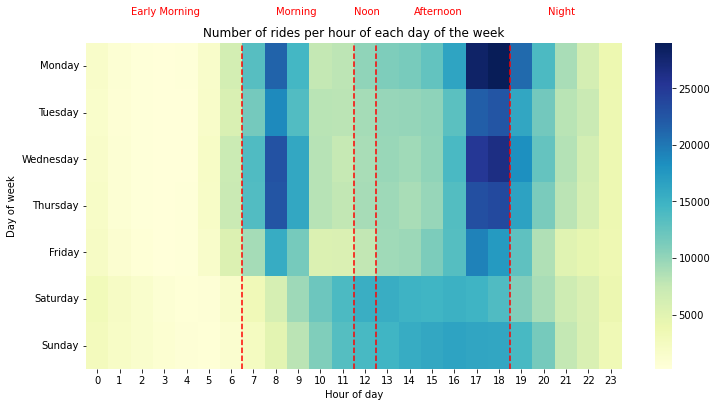

In [160]:
# 作图
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu')

plt.axvline(x=7, color='red', linestyle='--')
plt.axvline(x=12, color='red', linestyle='--')
plt.axvline(x=13, color='red', linestyle='--')
plt.axvline(x=19, color='red', linestyle='--')

plt.text(2, -0.6, 'Early Morning', color='red')
plt.text(8.5, -0.6, 'Morning', color='red')
plt.text(12, -0.6, 'Noon', color='red')
plt.text(14.7, -0.6, 'Afternoon', color='red')
plt.text(20.7, -0.6, 'Night', color='red')

plt.title('Number of rides per hour of each day of the week')
plt.xlabel('Hour of day')
plt.ylabel('Day of week')
plt.show()

## （1）第一张图：热力图（Number of rides per hour of each day of the week）
### 1、介绍：
### 查看用户在一周中哪一时间段骑车较为频繁
### 2、发现：
### 周一至周五（周中）的7点至9点，17点至19点开始骑车的用户人数最多
### 周六至周日（周末）的10点至19点开始骑车的用户人数比较多
### 3、个人理解：
### 周中7点至9点，17点至19点为上下班时间，所以骑车人数比较集中
### 周末10点至19点不用上班，可能以短距离骑行为目的的人数比较集中

In [161]:
# 将 start station id 与 start station latitude 分别改为 id 与 latitude，并保存至 start_id_latitude（end 亦然）
start_id_latitude = bikedata[['start station id', 'start station latitude']].rename(columns={'start station id': 'id', 'start station latitude': 'latitude'})
end_id_latitude = bikedata[['end station id', 'end station latitude']].rename(columns={'end station id': 'id', 'end station latitude': 'latitude'})

# 将 start station 和 end station 的 (id, latitude) 数据拼接在一起
id_latitude = pd.concat([start_id_latitude, end_id_latitude], ignore_index=True)
id_latitude

,id,latitude
0,3295,40.791270
1,326,40.729538
2,401,40.720196
3,539,40.715348
4,350,40.715595
...,...,...
2995439,3427,40.724305
2995440,3338,40.786259
2995441,358,40.732916
2995442,3236,40.758985


In [162]:
# 查看站点 latitude 与 id 号是否一一对应
print(id_latitude.groupby('id')['latitude'].nunique().max())
print(id_latitude.groupby('latitude')['id'].nunique().max())

1
1


In [163]:
# 将 start station id 与 start station longitude 分别改为 id 与 longitude，并保存至 start_id_longitude（end 亦然）
start_id_longitude = bikedata[['start station id', 'start station longitude']].rename(columns={'start station id': 'id', 'start station longitude': 'longitude'})
end_id_longitude = bikedata[['end station id', 'end station longitude']].rename(columns={'end station id': 'id', 'end station longitude': 'longitude'})

# 将 start station 和 end station 的 (id, longitude) 数据拼接在一起
id_longitude = pd.concat([start_id_longitude, end_id_longitude], ignore_index=True)
id_longitude

,id,longitude
0,3295,-73.964839
1,326,-73.984267
2,401,-73.989978
3,539,-73.960241
4,350,-73.987030
...,...,...
2995439,3427,-73.996010
2995440,3338,-73.945526
2995441,358,-74.007114
2995442,3236,-73.993800


In [164]:
# 查看站点 longitude 与 id 号是否一一对应
print(id_longitude.groupby('id')['longitude'].nunique().max())
print(id_longitude.groupby('longitude')['id'].nunique().max())

1
1


In [165]:
# 计算每个 start station id 的出现次数
station_counts = bikedata.groupby('start station id').size().reset_index(name='count')

# 创建一个包含每个 start station id 的 latitude 和 longitude 的 dataframe
station_locations = bikedata[['start station id', 'start station name', 'start station latitude', 'start station longitude']].drop_duplicates()

# 合并这两个 dataframe
station_info = pd.merge(station_counts, station_locations, on = 'start station id')
station_info

,start station id,count,start station name,start station latitude,start station longitude
0,72,3352,W 52 St & 11 Ave,40.767272,-73.993929
1,79,2546,Franklin St & W Broadway,40.719116,-74.006667
2,82,1046,St James Pl & Pearl St,40.711174,-74.000165
3,83,1373,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323
4,116,3714,W 17 St & 8 Ave,40.741776,-74.001497
...,...,...,...,...,...
617,3472,2745,W 15 St & 10 Ave,40.742754,-74.007474
618,3474,1632,6 Ave & Spring St,40.725256,-74.004121
619,3476,736,Norman Ave & Leonard St,40.725770,-73.950740
620,3477,52,39 St & 2 Ave - Citi Bike HQ at Industry City,40.655400,-74.010628


In [166]:
# 作图
import folium
from sklearn.preprocessing import MinMaxScaler

# 初始化一个 MinMaxScaler，设置输出范围
scaler = MinMaxScaler(feature_range = (1, 25))

# 使用 MinMaxScaler 将 count 列的值缩放到指定的范围
station_info['count_scaled'] = scaler.fit_transform(station_info[['count']])

# 取每个 start station latitude 与 longitude 的平均值，设定地图初始位置
map_osm = folium.Map(location = [station_info['start station latitude'].mean(), 
                               station_info['start station longitude'].mean()], 
                     zoom_start = 13)

# 对每个 start station 添加一个圆形标记
for idx, row in station_info.iterrows():
    # 只显示 count 值大于5000的站点
    if row['count'] > 5000:
        # 使用不同的颜色以更好地区分
        color = '#00FF00' if row['count'] > 8000 else '#a6bddb'
        marker = folium.CircleMarker([row['start station latitude'], row['start station longitude']],
                                      radius = row['count_scaled'],
                                      color = color,
                                      fill_color = color,
                                      popup =' '.join((row['start station name'], str(row['count']))))
        marker.add_to(map_osm)

map_osm

## （2）第二张图：地图
## （Distribution of bike rides at different start stations with varying usage frequencies）
### 1、介绍：
### 计算每个站点的骑行次数，地图上只显示骑行次数大于5000的站点，骑行次数大于8000的站点用绿色圆圈表示
### 点击圆圈可显示该站点的名称及骑行次数
### 2、发现：
### 骑车次数较多的“火”站点集中于该地区中心区域
### 3、个人理解：
### 中心区域人们的住宅区及各种设施可能比较集中

In [168]:
# 计算用户的年龄（2017年的数据，假设今年是2018年）
bikedata['age'] = 2018 - bikedata['birth year']
bikedata['age'] = bikedata['age'].astype(int)
bikedata = bikedata.reset_index(drop = True)
bikedata

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,start_day,start_hour,stop_day,stop_hour,weekday,age
0,143,2017-07-03 00:00:04,2017-07-03 00:02:27,3295,Central Park W & W 96 St,40.791270,-73.964839,3341,Central Park West & W 102 St,40.795346,-73.961860,20278,Subscriber,1970,1,2017-07-03,0,2017-07-03,0,Monday,48
1,319,2017-07-03 00:00:12,2017-07-03 00:05:32,326,E 11 St & 1 Ave,40.729538,-73.984267,285,Broadway & E 14 St,40.734546,-73.990741,15446,Subscriber,1956,1,2017-07-03,0,2017-07-03,0,Monday,62
2,453,2017-07-03 00:00:13,2017-07-03 00:07:47,401,Allen St & Rivington St,40.720196,-73.989978,293,Lafayette St & E 8 St,40.730207,-73.991026,29392,Subscriber,1977,1,2017-07-03,0,2017-07-03,0,Monday,41
3,153,2017-07-03 00:00:14,2017-07-03 00:02:48,539,Metropolitan Ave & Bedford Ave,40.715348,-73.960241,3087,Metropolitan Ave & Meeker Ave,40.714133,-73.952344,24998,Subscriber,1982,1,2017-07-03,0,2017-07-03,0,Monday,36
4,577,2017-07-03 00:00:16,2017-07-03 00:09:53,350,Clinton St & Grand St,40.715595,-73.987030,433,E 13 St & Avenue A,40.729554,-73.980572,17588,Subscriber,1960,1,2017-07-03,0,2017-07-03,0,Monday,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1497717,166,2017-07-30 23:59:25,2017-07-31 00:02:12,151,Cleveland Pl & Spring St,40.722104,-73.997249,3427,Lafayette St & Jersey St,40.724305,-73.996010,25836,Subscriber,1991,1,2017-07-30,23,2017-07-31,0,Sunday,27
1497718,296,2017-07-30 23:59:40,2017-07-31 00:04:37,3363,E 102 St & Park Ave,40.790483,-73.950331,3338,2 Ave & E 99 St,40.786259,-73.945526,28420,Subscriber,1969,2,2017-07-30,23,2017-07-31,0,Sunday,49
1497719,334,2017-07-30 23:59:56,2017-07-31 00:05:31,223,W 13 St & 7 Ave,40.737815,-73.999947,358,Christopher St & Greenwich St,40.732916,-74.007114,21326,Subscriber,1976,1,2017-07-30,23,2017-07-31,0,Sunday,42
1497720,388,2017-07-30 23:59:55,2017-07-31 00:06:24,449,W 52 St & 9 Ave,40.764618,-73.987895,3236,W 42 St & Dyer Ave,40.758985,-73.993800,27305,Subscriber,1979,1,2017-07-30,23,2017-07-31,0,Sunday,39


In [169]:
bikedata['gender'].value_counts()

1    1093418
2     397878
0       6426
Name: gender, dtype: int64

In [170]:
print(bikedata['age'].max())
print(bikedata['age'].min())

144
17


In [171]:
# 将 age 大于100岁的行视为无效样本，去除掉
bikedata = bikedata.drop(bikedata[bikedata['age'] >= 100].index)
bikedata = bikedata.reset_index(drop = True)
bikedata

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,start_day,start_hour,stop_day,stop_hour,weekday,age
0,143,2017-07-03 00:00:04,2017-07-03 00:02:27,3295,Central Park W & W 96 St,40.791270,-73.964839,3341,Central Park West & W 102 St,40.795346,-73.961860,20278,Subscriber,1970,1,2017-07-03,0,2017-07-03,0,Monday,48
1,319,2017-07-03 00:00:12,2017-07-03 00:05:32,326,E 11 St & 1 Ave,40.729538,-73.984267,285,Broadway & E 14 St,40.734546,-73.990741,15446,Subscriber,1956,1,2017-07-03,0,2017-07-03,0,Monday,62
2,453,2017-07-03 00:00:13,2017-07-03 00:07:47,401,Allen St & Rivington St,40.720196,-73.989978,293,Lafayette St & E 8 St,40.730207,-73.991026,29392,Subscriber,1977,1,2017-07-03,0,2017-07-03,0,Monday,41
3,153,2017-07-03 00:00:14,2017-07-03 00:02:48,539,Metropolitan Ave & Bedford Ave,40.715348,-73.960241,3087,Metropolitan Ave & Meeker Ave,40.714133,-73.952344,24998,Subscriber,1982,1,2017-07-03,0,2017-07-03,0,Monday,36
4,577,2017-07-03 00:00:16,2017-07-03 00:09:53,350,Clinton St & Grand St,40.715595,-73.987030,433,E 13 St & Avenue A,40.729554,-73.980572,17588,Subscriber,1960,1,2017-07-03,0,2017-07-03,0,Monday,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1497216,166,2017-07-30 23:59:25,2017-07-31 00:02:12,151,Cleveland Pl & Spring St,40.722104,-73.997249,3427,Lafayette St & Jersey St,40.724305,-73.996010,25836,Subscriber,1991,1,2017-07-30,23,2017-07-31,0,Sunday,27
1497217,296,2017-07-30 23:59:40,2017-07-31 00:04:37,3363,E 102 St & Park Ave,40.790483,-73.950331,3338,2 Ave & E 99 St,40.786259,-73.945526,28420,Subscriber,1969,2,2017-07-30,23,2017-07-31,0,Sunday,49
1497218,334,2017-07-30 23:59:56,2017-07-31 00:05:31,223,W 13 St & 7 Ave,40.737815,-73.999947,358,Christopher St & Greenwich St,40.732916,-74.007114,21326,Subscriber,1976,1,2017-07-30,23,2017-07-31,0,Sunday,42
1497219,388,2017-07-30 23:59:55,2017-07-31 00:06:24,449,W 52 St & 9 Ave,40.764618,-73.987895,3236,W 42 St & Dyer Ave,40.758985,-73.993800,27305,Subscriber,1979,1,2017-07-30,23,2017-07-31,0,Sunday,39


In [172]:
# 过滤掉性别为0，即 unknown 的行
filtered_data = bikedata[bikedata['gender'].isin([1, 2])]

# 1为 Male，2为 Female
gender_map = {1: 'Male', 2: 'Female'}
filtered_data['gender'] = filtered_data['gender'].map(gender_map)

# 将 tripduration 转换为分钟
filtered_data['tripduration'] = filtered_data['tripduration'] / 60

# 创建年龄组
filtered_data['age_group'] = pd.cut(filtered_data['age'], bins=np.arange(20, 100, 10), right=False)
filtered_data

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,start_day,start_hour,stop_day,stop_hour,weekday,age,age_group
0,2.383333,2017-07-03 00:00:04,2017-07-03 00:02:27,3295,Central Park W & W 96 St,40.791270,-73.964839,3341,Central Park West & W 102 St,40.795346,-73.961860,20278,Subscriber,1970,Male,2017-07-03,0,2017-07-03,0,Monday,48,"[40, 50)"
1,5.316667,2017-07-03 00:00:12,2017-07-03 00:05:32,326,E 11 St & 1 Ave,40.729538,-73.984267,285,Broadway & E 14 St,40.734546,-73.990741,15446,Subscriber,1956,Male,2017-07-03,0,2017-07-03,0,Monday,62,"[60, 70)"
2,7.550000,2017-07-03 00:00:13,2017-07-03 00:07:47,401,Allen St & Rivington St,40.720196,-73.989978,293,Lafayette St & E 8 St,40.730207,-73.991026,29392,Subscriber,1977,Male,2017-07-03,0,2017-07-03,0,Monday,41,"[40, 50)"
3,2.550000,2017-07-03 00:00:14,2017-07-03 00:02:48,539,Metropolitan Ave & Bedford Ave,40.715348,-73.960241,3087,Metropolitan Ave & Meeker Ave,40.714133,-73.952344,24998,Subscriber,1982,Male,2017-07-03,0,2017-07-03,0,Monday,36,"[30, 40)"
4,9.616667,2017-07-03 00:00:16,2017-07-03 00:09:53,350,Clinton St & Grand St,40.715595,-73.987030,433,E 13 St & Avenue A,40.729554,-73.980572,17588,Subscriber,1960,Male,2017-07-03,0,2017-07-03,0,Monday,58,"[50, 60)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1497216,2.766667,2017-07-30 23:59:25,2017-07-31 00:02:12,151,Cleveland Pl & Spring St,40.722104,-73.997249,3427,Lafayette St & Jersey St,40.724305,-73.996010,25836,Subscriber,1991,Male,2017-07-30,23,2017-07-31,0,Sunday,27,"[20, 30)"
1497217,4.933333,2017-07-30 23:59:40,2017-07-31 00:04:37,3363,E 102 St & Park Ave,40.790483,-73.950331,3338,2 Ave & E 99 St,40.786259,-73.945526,28420,Subscriber,1969,Female,2017-07-30,23,2017-07-31,0,Sunday,49,"[40, 50)"
1497218,5.566667,2017-07-30 23:59:56,2017-07-31 00:05:31,223,W 13 St & 7 Ave,40.737815,-73.999947,358,Christopher St & Greenwich St,40.732916,-74.007114,21326,Subscriber,1976,Male,2017-07-30,23,2017-07-31,0,Sunday,42,"[40, 50)"
1497219,6.466667,2017-07-30 23:59:55,2017-07-31 00:06:24,449,W 52 St & 9 Ave,40.764618,-73.987895,3236,W 42 St & Dyer Ave,40.758985,-73.993800,27305,Subscriber,1979,Male,2017-07-30,23,2017-07-31,0,Sunday,39,"[30, 40)"


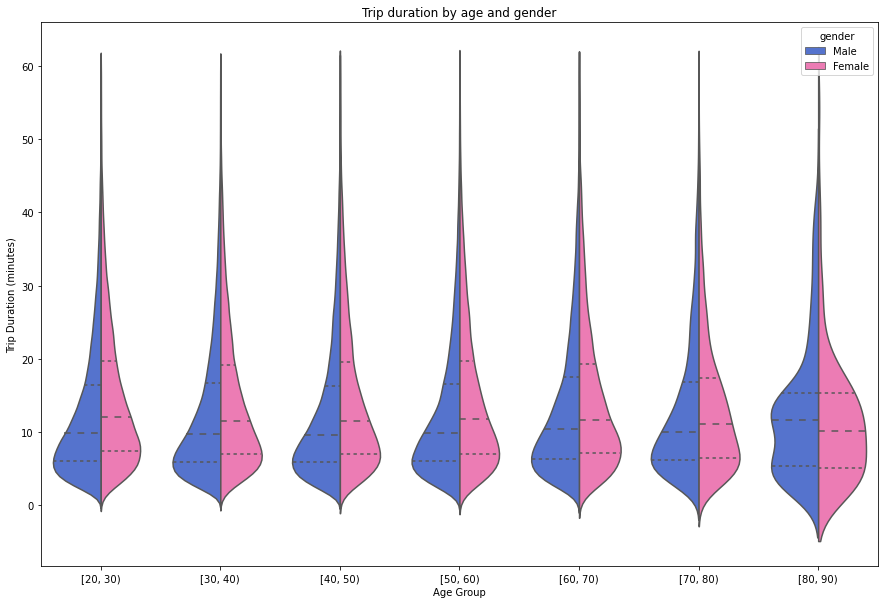

In [173]:
# 作图
fig, ax = plt.subplots(figsize=(15, 10))
sns.violinplot(x='age_group', y='tripduration', hue='gender', data=filtered_data, ax=ax, split=True, inner='quartile', 
               palette={'Male': '#4169E1', 'Female': '#FF69B4'})
ax.set_title('Trip duration by age and gender')
ax.set_xlabel('Age Group')
ax.set_ylabel('Trip Duration (minutes)')
plt.show()

## （3）第三张图：小提琴图（Trip duration by age and gender）
### 1、介绍：
### 将用户年龄分成 [20,30) 等年龄段，查看不同年龄段不同性别在骑行时间上有何区别
### 2、发现：
### 除了 [80,90)年龄段中位数外，其他所有情况女性汽车时间比男性长
### 3、个人理解：
### 男性可能比女性健壮，骑行同一路程花费时间相对较少

In [174]:
# 将 start station id 与 end station id 捆绑在一起
filtered_data['route'] = filtered_data.apply(lambda row: tuple(sorted([row['start station id'], row['end station id']])), axis=1)

In [175]:
pd.set_option('display.max_columns', None)
filtered_data

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,start_day,start_hour,stop_day,stop_hour,weekday,age,age_group,route
0,2.383333,2017-07-03 00:00:04,2017-07-03 00:02:27,3295,Central Park W & W 96 St,40.791270,-73.964839,3341,Central Park West & W 102 St,40.795346,-73.961860,20278,Subscriber,1970,Male,2017-07-03,0,2017-07-03,0,Monday,48,"[40, 50)","(3295, 3341)"
1,5.316667,2017-07-03 00:00:12,2017-07-03 00:05:32,326,E 11 St & 1 Ave,40.729538,-73.984267,285,Broadway & E 14 St,40.734546,-73.990741,15446,Subscriber,1956,Male,2017-07-03,0,2017-07-03,0,Monday,62,"[60, 70)","(285, 326)"
2,7.550000,2017-07-03 00:00:13,2017-07-03 00:07:47,401,Allen St & Rivington St,40.720196,-73.989978,293,Lafayette St & E 8 St,40.730207,-73.991026,29392,Subscriber,1977,Male,2017-07-03,0,2017-07-03,0,Monday,41,"[40, 50)","(293, 401)"
3,2.550000,2017-07-03 00:00:14,2017-07-03 00:02:48,539,Metropolitan Ave & Bedford Ave,40.715348,-73.960241,3087,Metropolitan Ave & Meeker Ave,40.714133,-73.952344,24998,Subscriber,1982,Male,2017-07-03,0,2017-07-03,0,Monday,36,"[30, 40)","(539, 3087)"
4,9.616667,2017-07-03 00:00:16,2017-07-03 00:09:53,350,Clinton St & Grand St,40.715595,-73.987030,433,E 13 St & Avenue A,40.729554,-73.980572,17588,Subscriber,1960,Male,2017-07-03,0,2017-07-03,0,Monday,58,"[50, 60)","(350, 433)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1497216,2.766667,2017-07-30 23:59:25,2017-07-31 00:02:12,151,Cleveland Pl & Spring St,40.722104,-73.997249,3427,Lafayette St & Jersey St,40.724305,-73.996010,25836,Subscriber,1991,Male,2017-07-30,23,2017-07-31,0,Sunday,27,"[20, 30)","(151, 3427)"
1497217,4.933333,2017-07-30 23:59:40,2017-07-31 00:04:37,3363,E 102 St & Park Ave,40.790483,-73.950331,3338,2 Ave & E 99 St,40.786259,-73.945526,28420,Subscriber,1969,Female,2017-07-30,23,2017-07-31,0,Sunday,49,"[40, 50)","(3338, 3363)"
1497218,5.566667,2017-07-30 23:59:56,2017-07-31 00:05:31,223,W 13 St & 7 Ave,40.737815,-73.999947,358,Christopher St & Greenwich St,40.732916,-74.007114,21326,Subscriber,1976,Male,2017-07-30,23,2017-07-31,0,Sunday,42,"[40, 50)","(223, 358)"
1497219,6.466667,2017-07-30 23:59:55,2017-07-31 00:06:24,449,W 52 St & 9 Ave,40.764618,-73.987895,3236,W 42 St & Dyer Ave,40.758985,-73.993800,27305,Subscriber,1979,Male,2017-07-30,23,2017-07-31,0,Sunday,39,"[30, 40)","(449, 3236)"


In [176]:
# 视 (A, B) 与 (B, A) 为同一条路线，赋予相同的 route_id
filtered_data['route_id'] = filtered_data.groupby('route').ngroup()
filtered_data

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,start_day,start_hour,stop_day,stop_hour,weekday,age,age_group,route,route_id
0,2.383333,2017-07-03 00:00:04,2017-07-03 00:02:27,3295,Central Park W & W 96 St,40.791270,-73.964839,3341,Central Park West & W 102 St,40.795346,-73.961860,20278,Subscriber,1970,Male,2017-07-03,0,2017-07-03,0,Monday,48,"[40, 50)","(3295, 3341)",88296
1,5.316667,2017-07-03 00:00:12,2017-07-03 00:05:32,326,E 11 St & 1 Ave,40.729538,-73.984267,285,Broadway & E 14 St,40.734546,-73.990741,15446,Subscriber,1956,Male,2017-07-03,0,2017-07-03,0,Monday,62,"[60, 70)","(285, 326)",22074
2,7.550000,2017-07-03 00:00:13,2017-07-03 00:07:47,401,Allen St & Rivington St,40.720196,-73.989978,293,Lafayette St & E 8 St,40.730207,-73.991026,29392,Subscriber,1977,Male,2017-07-03,0,2017-07-03,0,Monday,41,"[40, 50)","(293, 401)",22972
3,2.550000,2017-07-03 00:00:14,2017-07-03 00:02:48,539,Metropolitan Ave & Bedford Ave,40.715348,-73.960241,3087,Metropolitan Ave & Meeker Ave,40.714133,-73.952344,24998,Subscriber,1982,Male,2017-07-03,0,2017-07-03,0,Monday,36,"[30, 40)","(539, 3087)",72279
4,9.616667,2017-07-03 00:00:16,2017-07-03 00:09:53,350,Clinton St & Grand St,40.715595,-73.987030,433,E 13 St & Avenue A,40.729554,-73.980572,17588,Subscriber,1960,Male,2017-07-03,0,2017-07-03,0,Monday,58,"[50, 60)","(350, 433)",36911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1497216,2.766667,2017-07-30 23:59:25,2017-07-31 00:02:12,151,Cleveland Pl & Spring St,40.722104,-73.997249,3427,Lafayette St & Jersey St,40.724305,-73.996010,25836,Subscriber,1991,Male,2017-07-30,23,2017-07-31,0,Sunday,27,"[20, 30)","(151, 3427)",4531
1497217,4.933333,2017-07-30 23:59:40,2017-07-31 00:04:37,3363,E 102 St & Park Ave,40.790483,-73.950331,3338,2 Ave & E 99 St,40.786259,-73.945526,28420,Subscriber,1969,Female,2017-07-30,23,2017-07-31,0,Sunday,49,"[40, 50)","(3338, 3363)",90654
1497218,5.566667,2017-07-30 23:59:56,2017-07-31 00:05:31,223,W 13 St & 7 Ave,40.737815,-73.999947,358,Christopher St & Greenwich St,40.732916,-74.007114,21326,Subscriber,1976,Male,2017-07-30,23,2017-07-31,0,Sunday,42,"[40, 50)","(223, 358)",9355
1497219,6.466667,2017-07-30 23:59:55,2017-07-31 00:06:24,449,W 52 St & 9 Ave,40.764618,-73.987895,3236,W 42 St & Dyer Ave,40.758985,-73.993800,27305,Subscriber,1979,Male,2017-07-30,23,2017-07-31,0,Sunday,39,"[30, 40)","(449, 3236)",57345


In [199]:
import random

# 只过滤 age group 为 [20,30) 的列
filtered_data_age = filtered_data[filtered_data['age_group'] == pd.Interval(20, 30, closed='left')]

# 获取 unique route ids
unique_route_ids = filtered_data_age['route_id'].unique()

# 用random 随机选取任意的 route id
selected_route_id = random.choice(unique_route_ids)

# 过滤对应 route id 的数据
filtered_data_route = filtered_data_age[filtered_data_age['route_id'] == selected_route_id]

# 保存至新的 dataframe
new_df = filtered_data_route[['age_group', 'route_id', 'gender', 'tripduration']]
new_df

,age_group,route_id,gender,tripduration
366079,"[20, 30)",62587,Male,18.166667
607987,"[20, 30)",62587,Male,14.833333
655360,"[20, 30)",62587,Male,14.216667
1369510,"[20, 30)",62587,Female,13.233333
1372800,"[20, 30)",62587,Female,20.800000
1452294,"[20, 30)",62587,Female,20.500000


In [202]:
# 计算不同 gender 的 tripduration 平均值
average_trip_duration = new_df.groupby('gender')['tripduration'].mean()
average_trip_duration

gender
Female    18.177778
Male      15.738889
Name: tripduration, dtype: float64

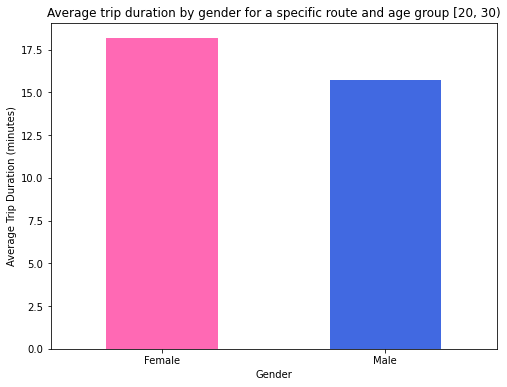

In [206]:
# 作图
plt.figure(figsize=(8,6))
average_trip_duration.plot(kind='bar', color=['#FF69B4', '#4169E1'])
plt.title('Average trip duration by gender for a specific route and age group [20, 30)')
plt.xlabel('Gender')
plt.ylabel('Average Trip Duration (minutes)')
plt.xticks(rotation=0)
plt.show()

## （4）第四张图：柱状图
## （Average trip duration by gender for a specific route and age group [20, 30)）
### 1、介绍：
### 第三张图发现男性平均骑行时间比女性短，从此推测男性由于比女性健壮，骑行同一路程所花费的时间较少
### 为了验证推测是否可靠，做了如下工作：
### 将 start station id 与 end station id 捆绑在一起，视 (A, B) 与 (B, A) 为同一条路线，赋予相同的 route_id
### 用random 随机选取任意的 route id，并过滤对应 route id 的数据（这里只做了[20,30)的情况）
### 2、发现：
### 在route_id为62587的路线上，男性平均骑行时间确实比女性短
### 3、个人理解：
### 第三张图的个人理解比较可靠，但这只是随机的一种情况，并不能代表所有情况

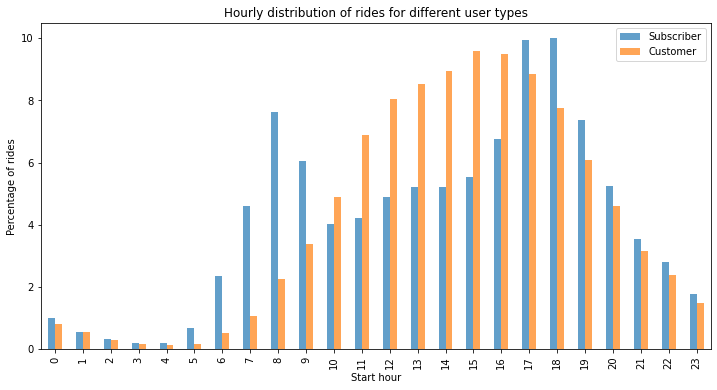

In [207]:
# 计算每种 usertype 的总人数
total_sub = filtered_data[filtered_data['usertype'] == 'Subscriber'].shape[0]
total_cus = filtered_data[filtered_data['usertype'] == 'Customer'].shape[0]

# 计算每个 start_hour 的骑行次数
sub_start_hours = filtered_data[filtered_data['usertype'] == 'Subscriber']['start_hour'].value_counts(normalize=True) * 100
cus_start_hours = filtered_data[filtered_data['usertype'] == 'Customer']['start_hour'].value_counts(normalize=True) * 100

# 组合成 dataframe
hourly_distribution = pd.DataFrame({
    'Subscriber': sub_start_hours,
    'Customer': cus_start_hours
}).sort_index()

# 作图
hourly_distribution.plot.bar(alpha=0.7, figsize=(12, 6))
plt.title('Hourly distribution of rides for different user types')
plt.xlabel('Start hour')
plt.ylabel('Percentage of rides')
plt.show()

## （5）第五张图：直方图（Trip duration by age and gender）
### 1、介绍：
### 查看两种不同用户在不同时间段的骑行次数有何区别，以便比较这两种用户的骑行模式
### 2、发现：
### 6点至9点为Subscriber的骑行比例显著高的时间段，11点至16点则为Customer显著高的时间段
### 3、个人理解：
### 3.1、Subscriber为注册用户，骑行在6点至9点，17点至19点较为集中，
### 结合第一张图，可能他们以共享单车作为主要的上下班交通工具
### 3.2、Customer为一般用户，骑行在11点至16点较为集中，
### 他们可能以短距离骑行为目的骑车